In [8]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [9]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


In [10]:
print(star_wars.columns)

Index(['RespondentID', 'Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?', 'Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Which character shot first?', 'Are you familiar with the Expanded Universe?', 'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦', 'Do y

In [11]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [12]:
columns = ['Have you seen any of the 6 films in the Star Wars franchise?',
          'Do you consider yourself to be a fan of the Star Wars film franchise?']
for col in columns:
    star_wars[col] = star_wars[col].map({"Yes" : "True", "No" : "False"})



In [13]:
star_wars[columns[0]].head()

1     True
2    False
3     True
4     True
5     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: object

In [15]:
column_titles = star_wars.columns[3:9]
movie_titles = []

for col in column_titles:
    movie_titles.append(star_wars[col].value_counts().index[0])


print(movie_titles)

['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones', 'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope', 'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the Jedi']


In [16]:
count = 1
for col, mov in zip(column_titles, movie_titles):
    print(col, mov, count)
    star_wars[col] = star_wars[col].map({mov:True, "NaN":False})
    star_wars = star_wars.rename(columns={col:"seen_"+str(count)})
    count+=1
    



Which of the following Star Wars films have you seen? Please select all that apply. Star Wars: Episode I  The Phantom Menace 1
Unnamed: 4 Star Wars: Episode II  Attack of the Clones 2
Unnamed: 5 Star Wars: Episode III  Revenge of the Sith 3
Unnamed: 6 Star Wars: Episode IV  A New Hope 4
Unnamed: 7 Star Wars: Episode V The Empire Strikes Back 5
Unnamed: 8 Star Wars: Episode VI Return of the Jedi 6


In [18]:
print(star_wars.columns)
print(star_wars.seen_1, star_wars.seen_2, star_wars.seen_6)

Index(['RespondentID', 'Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?', 'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Which character shot first?', 'Are you familiar with the Expanded Universe?', 'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦', 'Do you consider yourself to be a fan of the Star Trek franchise?', 'Gender', 'Age', 'Household Income

In [19]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [20]:
column_titles = star_wars.columns[9:15]
count = 1
for col in column_titles:
    star_wars = star_wars.rename(columns={col:"ranking_"+str(count)})
    count+=1
    


In [21]:
print(star_wars['ranking_1'], star_wars['ranking_3'], star_wars['ranking_6'])

1      3
2    NaN
3      1
4      5
5      5
6      1
7      6
8      4
9      5
10     1
11   NaN
12   NaN
13     3
14     4
15     4
...
1172     6
1173     2
1174     5
1175     1
1176     1
1177     2
1178     1
1179   NaN
1180     3
1181     3
1182     5
1183     4
1184   NaN
1185     4
1186     6
Name: ranking_1, Length: 1186, dtype: float64 1      1
2    NaN
3      3
4      1
5      6
6      3
7      4
8      6
9      6
10     3
11   NaN
12   NaN
13     5
14     6
15     5
...
1172     1
1173     4
1174     6
1175     3
1176     4
1177     3
1178     3
1179   NaN
1180     5
1181     5
1182     6
1183     6
1184   NaN
1185     6
1186     2
Name: ranking_3, Length: 1186, dtype: float64 1      6
2    NaN
3      6
4      3
5      3
6      2
7      2
8      1
9      3
10     6
11   NaN
12   NaN
13     2
14     1
15     6
...
1172     4
1173     5
1174     1
1175     6
1176     5
1177     6
1178     6
1179   NaN
1180     2
1181     6
1182     1
1183     1
1184   NaN
1185     1
1186   

In [23]:
avg_rankings = []
for col in star_wars.columns[9:15]:
    avg_rankings.append(star_wars[col].mean())
    
print(avg_rankings)

[3.7329341317365268, 4.0873205741626792, 4.341317365269461, 3.2727272727272729, 2.513157894736842, 3.0478468899521531]


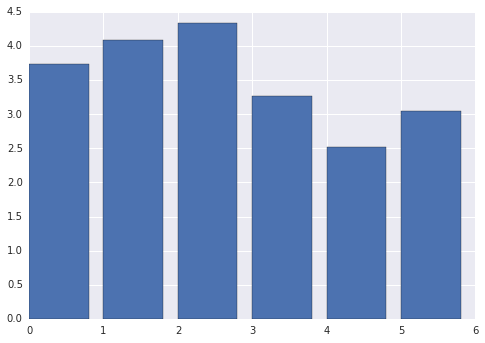

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(range(len(avg_rankings)),avg_rankings)
plt.show()

# Evaluating Star Wars rankings
## Audit and clean the data
### Initial steps included removing missing respondent ID rows, converting binary string data (Y/N) into booleans and renaming column names to be more wieldy.
### In addition, data within particular fields were transformed to include consistent information (i.e. the presence/absence of a movie title was changed to T/F).

## Perform analysis and look at the data
### Ranking variables were averaged across movies and a simple bar chart illustrates the six movie rankings, clearly with Empire as the favorite.

In [30]:
seen_list = []
for i in range(1,7):
    seen_list.append(star_wars["seen_"+str(i)].sum())
print(seen_list)

[673, 571, 550, 607, 758, 738]


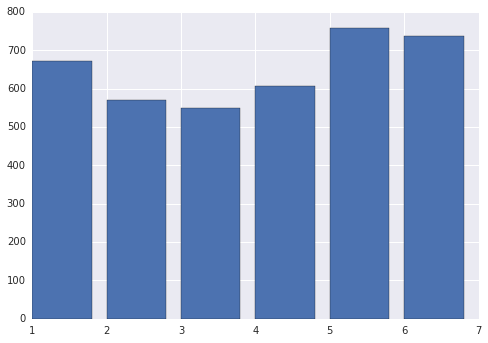

In [32]:
plt.bar(range(1,7), seen_list)
plt.show()

## Data visualization cont.
### While Empire is the clear favorite, let's look at which movie has been seen the most.  Not surprisingly there seems to be a strong correlation between the ranking of the movie and how many times the movie had been seen.

In [33]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

true_fan_ST = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
false_fan_ST = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]



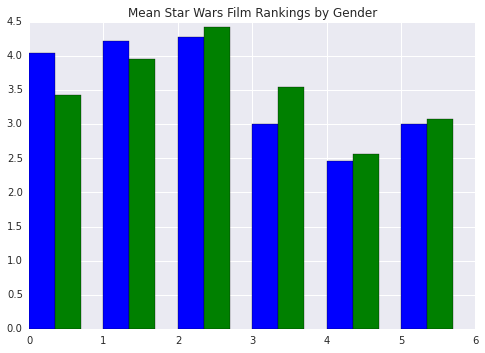

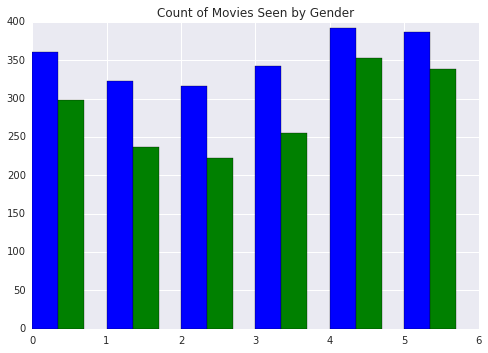

In [42]:
import numpy as np

def avg_rankings(data):
    avg = []
    for col in data.columns[9:15]:
        avg.append(data[col].mean())
    return avg


def seen_list(data):
    seen = []
    for i in range(1,7):
        seen.append(data["seen_"+str(i)].sum())
    return seen


index = np.arange(len(avg_rankings(males)))
bar_width = 0.35

plt.bar(index,avg_rankings(males), bar_width, color='b')
plt.bar(index+bar_width, avg_rankings(females), bar_width, color='g')
plt.title("Mean Star Wars Film Rankings by Gender")
plt.show()


index = np.arange(len(seen_list(males)))

plt.bar(index, seen_list(males), bar_width, color='b')
plt.bar(index+bar_width, seen_list(females), bar_width, color='g')
plt.title("Count of Movies Seen by Gender")
plt.show()

## Identify patterns
### Splitting the data set by Gender reveals that for the most part, males and females rank the Star Wars movies equivalently (excepting for the unfortunate case where females tend to like Phantom slightly more than A New Hope).  Unsurprisingly females have seen the Star Wars movies 